#ISONE winter OSW + Solar Analysis
This notebook is designed to re-perform the analysis of winter months, this time with the addition of current solar resources.

**Part 1:**
To run this notebook as-is:


*   Navigate to the ISONE website: https://www.iso-ne.com/system-planning/planning-models-and-data/variable-energy-resource-data
*   Find the zip folder "**2023 ISO-NE Variable Energy Resource (VER) Data Series (2000-2022) Rev. 0**", download and unzip
*   Naviagate to the "wind" folder to find the file **2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv**
*   Navigate to the "load" folder to find the file **ISONE_grossload_metdata_spliced_23yr_EPT.csv**

*   Navigate to the "solar" folder to find the file **ISONE_solarcapacity_modeled_23yr_EPT.csv**







We will start with the OSW data in step 1 below.

In [1]:
#Step 1: Upload the offshore wind file when prompted, it should match the file listed below.
from google.colab import files
uploaded = files.upload()

#This is a test line to see if I can save to github via an upload with the same name

Saving 2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv to 2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv


In [2]:
#Step 2: Read the CSV file into a dataframe for management/cleaning.

import pandas as pd
df = pd.read_csv('2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv')

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
print(df.head())

#Step 4: Create a new dataframe, "wind_data" with just the information we want.

#First, change the "Date" column in the original dataframe to "datetime" format.
#The datetime format allows us to manipulate the dates easily: https://docs.python.org/3/library/datetime.html
df['Date'] = pd.to_datetime(df['Date'])

#Next, create a new dataframe named "wind_data" to copy over just the columns we want.
wind_data = pd.DataFrame()

#Then, copy over the date column, which we have already put in datetime format!
wind_data['Date'] = df['Date'].copy()

#Finally, sum together the CP for every hour of the wind data, then add that as a column to our new dataframe as "Net CP for Turbines".
wind_data['Net CP for Turbines'] = sum([df['HE1'], df['HE2'], df['HE3'], df['HE4'], df['HE5'],
                                        df['HE6'], df['HE7'], df['HE8'], df['HE9'], df['HE10'],
                                        df['HE11'], df['HE12'], df['HE13'], df['HE14'], df['HE15'],
                                        df['HE16'], df['HE17'], df['HE18'], df['HE19'], df['HE20'],
                                        df['HE21'], df['HE22'], df['HE23'], df['HE24']])

#We can print the new dataframe to make sure we have what we want!
print(wind_data)

      LZ        Date  Year  Month  Day  yr_day  yr_wk day_type     HE1  \
0  ISONE  01/01/2000  2000      1    1       1      0       WE  0.1182   
1  ISONE  01/02/2000  2000      1    2       2      1       WE  0.6034   
2  ISONE  01/03/2000  2000      1    3       3      1       WD  0.9358   
3  ISONE  01/04/2000  2000      1    4       4      1       WD  0.6101   
4  ISONE  01/05/2000  2000      1    5       5      1       WD  0.9231   

      HE2  ...    HE15    HE16    HE17    HE18    HE19    HE20    HE21  \
0  0.1128  ...  0.7474  0.8130  0.8483  0.8691  0.8735  0.8513  0.8644   
1  0.4819  ...  0.8502  0.8597  0.8855  0.9102  0.9183  0.9264  0.9357   
2  0.9369  ...  0.3960  0.3264  0.2228  0.1880  0.2142  0.2552  0.2616   
3  0.7262  ...  0.8515  0.7099  0.6723  0.6208  0.6287  0.5647  0.5804   
4  0.9075  ...  0.9225  0.9190  0.9028  0.8953  0.8761  0.8874  0.8830   

     HE22    HE23    HE24  
0  0.8359  0.7853  0.7326  
1  0.9347  0.9372  0.9372  
2  0.3077  0.3615  0.4225 

**Part 2:** Read in and clean/format the load data!

In [3]:
#Step 1: Upload the load file when prompted, it should match the file listed below.
from google.colab import files
uploaded = files.upload()

Saving ISONE_grossload_metdata_spliced_23yr_EPT.csv to ISONE_grossload_metdata_spliced_23yr_EPT.csv


In [4]:
#Step 2: Read the CSV file into a dataframe for management/cleaning.
import pandas as pd
df = pd.read_csv('ISONE_grossload_metdata_spliced_23yr_EPT.csv')

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
print(df.head())

#Step 4: Combine the grid load based on dates, sum the load for the same day!
#We will use the groupby() function, and group the rows by day, summing over load column.
#We will save this into a series, which will have the date as the index, and the load for each cummulative day as the value.
gl = df.groupby('Date')['ISONE_grs_ld'].sum()

#Now, create a new dataframe for the grid_load, similar to the wind_data from above.
grid_load = pd.DataFrame()

#Then, copy over the indexes (dates) and values (cummulative load) to the new data frame.
grid_load['Date'] = gl.index.copy()
grid_load['Load'] = gl.values.copy()

#Ensure the date is in datetime format!
grid_load['Date'] = pd.to_datetime(grid_load['Date'])

#Print to make sure you have the data in the correct format!
print(grid_load)

         Date  Hour_Ending  ISONE_grs_ld  ISONE_temp  ISONE_rh  ISONE_ghi  \
0  1999-12-31           20     13973.870       1.000    63.544        0.0   
1  1999-12-31           21     15327.421      -1.728    58.923        0.0   
2  1999-12-31           22     15840.597      -2.555    66.559        0.0   
3  1999-12-31           23     15095.283      -2.888    63.212        0.0   
4  1999-12-31           24     13747.394      -3.503    62.954        0.0   

   ISONE_10m_lz_wnd_spd  ISONE_onsw_wnd_spd  ISONE_ofsw_wnd_spd  
0                 1.528               7.405               4.824  
1                 1.883               7.995               4.924  
2                 2.344               7.448               5.243  
3                 2.734               7.123               5.406  
4                 2.997               6.831               5.574  
           Date        Load
0    1999-12-31   73984.565
1    2000-01-01  354832.061
2    2000-01-02  349242.490
3    2000-01-03  350583.444
4

**Part 3:** Read in and clean/format the solar resource data.

In [5]:
#Step 1: Upload the solar file when prompted, it should match the file listed below.
from google.colab import files
uploaded = files.upload()

Saving ISONE_solarcapacity_modeled_23yr_EPT.csv to ISONE_solarcapacity_modeled_23yr_EPT.csv


In [6]:
#Step 2: Read the CSV file into a dataframe for management/cleaning.
import pandas as pd
df = pd.read_csv('ISONE_solarcapacity_modeled_23yr_EPT.csv', skiprows=1)

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
print(df.head())
#Step 4: Combine the solar supply capacity factors based on dates, sum the solar supply for the same day!
#We will use the groupby() function, and group the rows by day, summing over the power column.
#We will save this into a series, which will have the date as the index, and the supply for each cummulative day as the value.
pv = df.groupby('Date')['ISONE_pv_pwr'].sum()

#Now, create a new dataframe for the pv power, similar to the grid_load from above.
pv_power = pd.DataFrame()

#Then, copy over the indexes (dates) and values (solar CP sums) to the new data frame.
pv_power['Date'] = pv.index.copy()
pv_power['Solar Power CP'] = pv.values.copy()

#Ensure the date is in datetime format!
pv_power['Date'] = pd.to_datetime(pv_power['Date'])

#Print to make sure you have the data in the correct format!
print(pv_power)

         Date  Hour_Ending  ISONE_pv_pwr
0  1999-12-31           20           0.0
1  1999-12-31           21           0.0
2  1999-12-31           22           0.0
3  1999-12-31           23           0.0
4  1999-12-31           24           0.0
           Date  Solar Power CP
0    1999-12-31        0.000000
1    2000-01-01        1.709263
2    2000-01-02        0.599718
3    2000-01-03        0.868599
4    2000-01-04        0.197456
...         ...             ...
8398 2022-12-28        1.398478
8399 2022-12-29        2.216775
8400 2022-12-30        2.175487
8401 2022-12-31        0.320828
8402 2023-01-01        0.000000

[8403 rows x 2 columns]


**Part 4:** Combine our 3 new dataframes so that they share a date column.

In [7]:
#Step 1: Use the merge function, provided by Pandas, to combine the three dataframes in two steps.
wind_solar_load_data = pd.merge(grid_load, wind_data, on = "Date", how = "left")
wind_solar_load_data = pd.merge(wind_solar_load_data, pv_power, on = "Date", how = "left")
#Print to ensure we have gotten it right!
print(wind_solar_load_data)

           Date        Load  Net CP for Turbines  Solar Power CP
0    1999-12-31   73984.565                  NaN        0.000000
1    2000-01-01  354832.061              11.9738        1.709263
2    2000-01-02  349242.490              16.2638        0.599718
3    2000-01-03  350583.444              15.3354        0.868599
4    2000-01-04  345941.275              19.2895        0.197456
...         ...         ...                  ...             ...
8398 2022-12-28  350730.536               9.0555        1.398478
8399 2022-12-29  328251.077              14.4821        2.216775
8400 2022-12-30  304037.998              14.4530        2.175487
8401 2022-12-31  288181.831              13.8022        0.320828
8402 2023-01-01   11102.659                  NaN        0.000000

[8403 rows x 4 columns]


**Part 5:** Loop over all potential years to determine average number of days with elevated risk and plot this data!

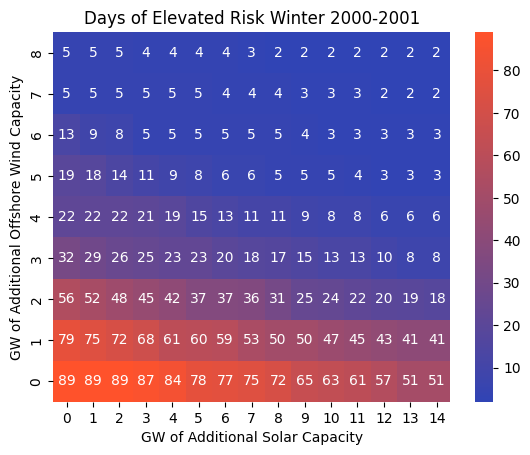

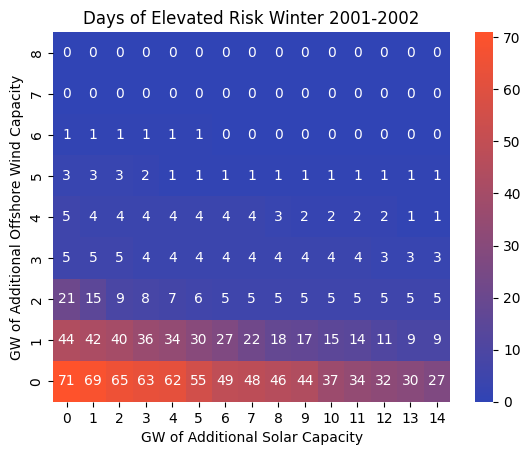

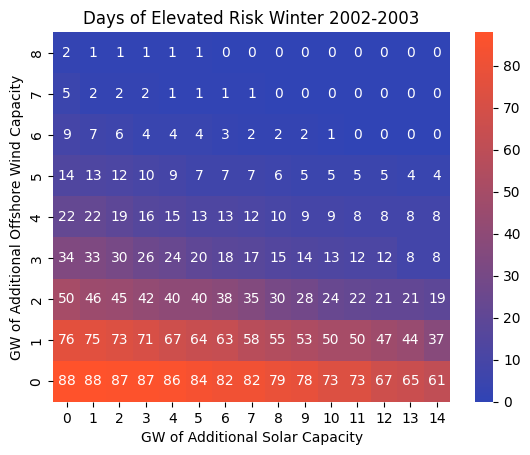

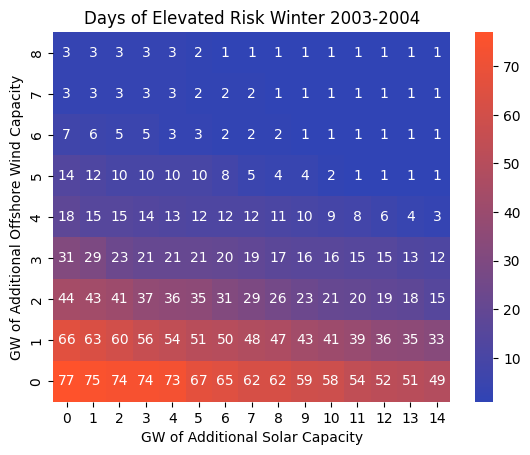

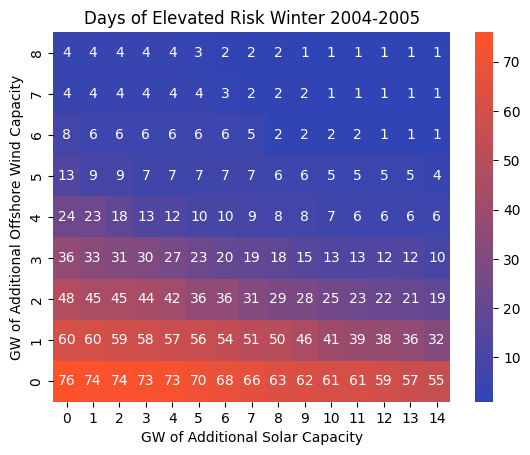

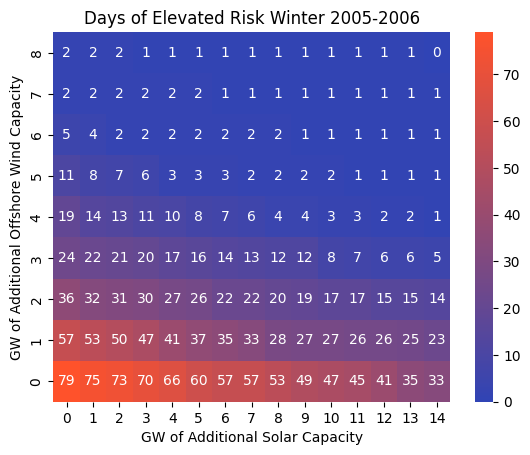

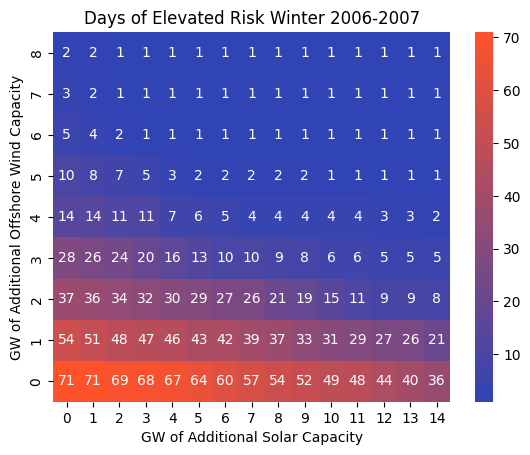

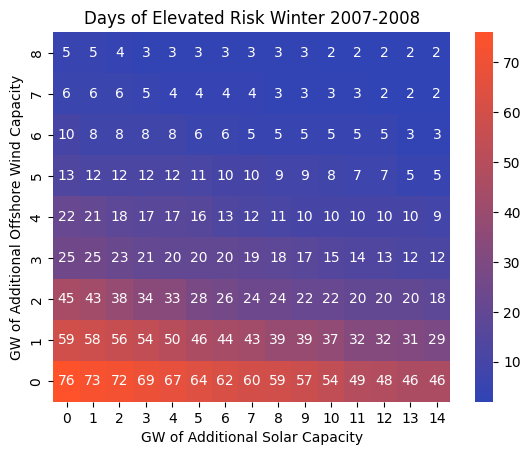

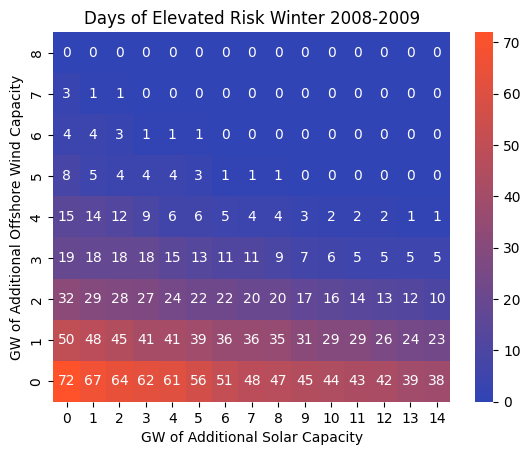

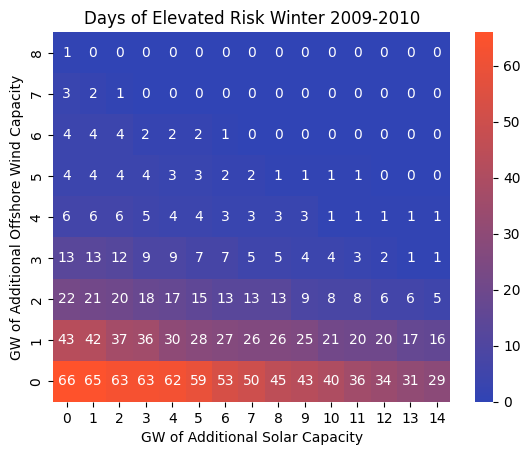

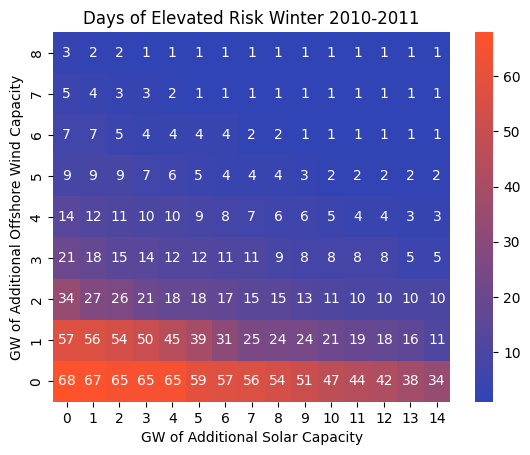

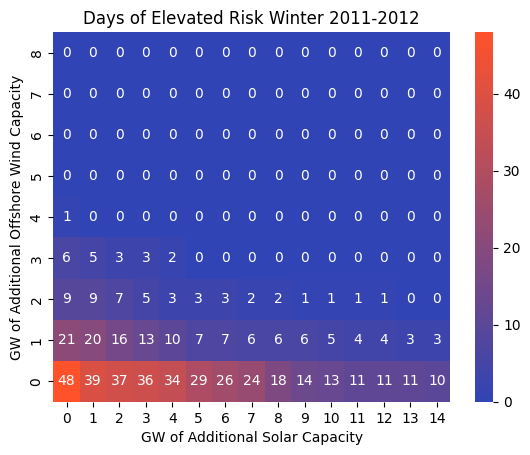

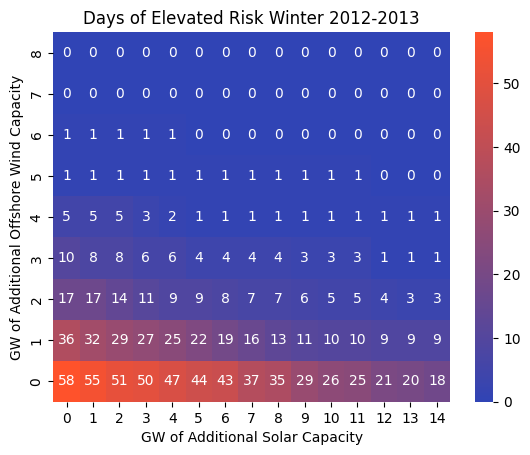

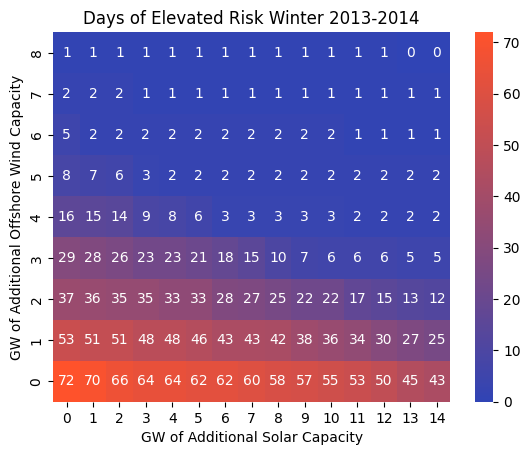

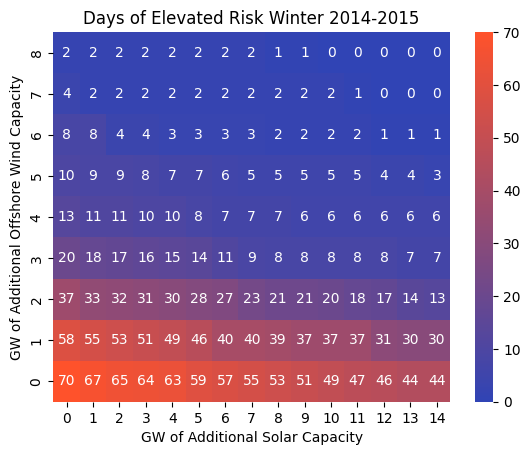

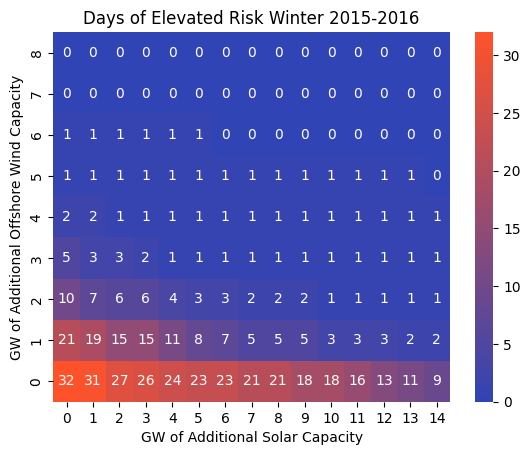

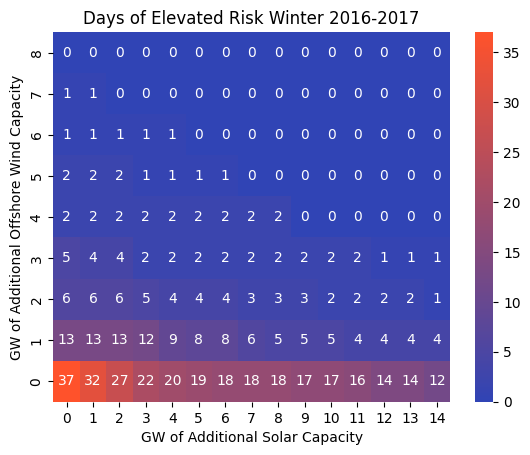

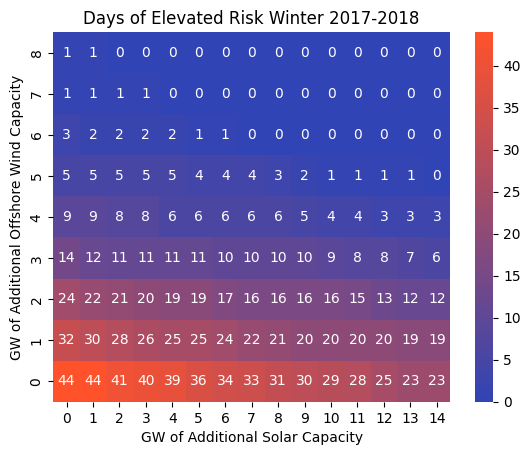

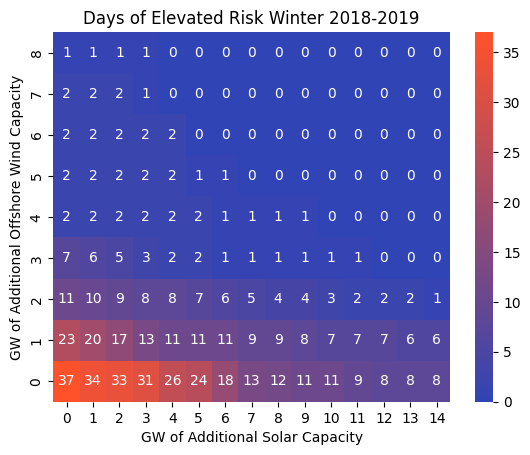

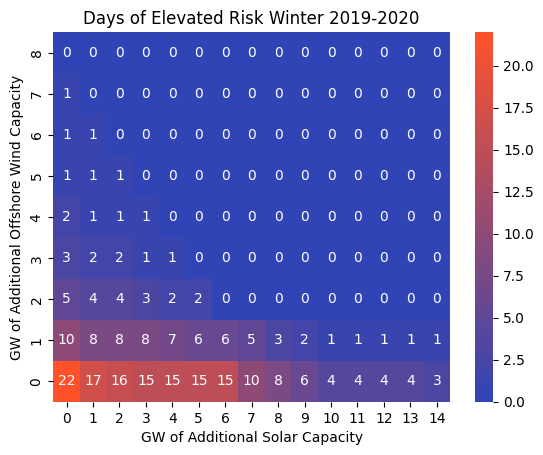

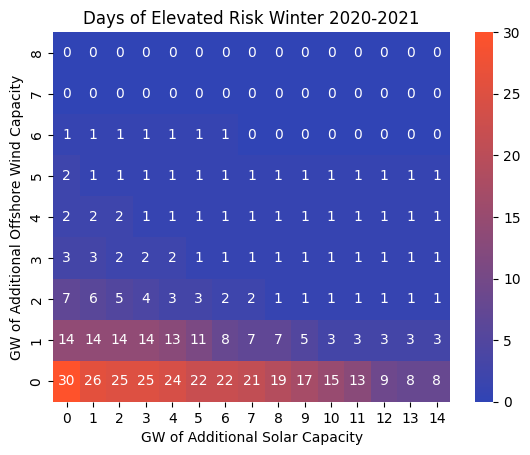

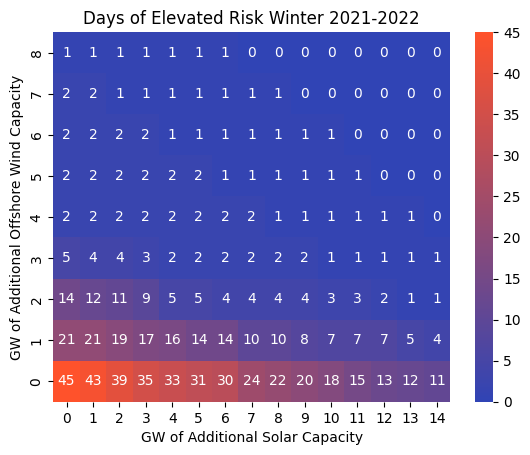

In [11]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns


from matplotlib.colors import LinearSegmentedColormap
# Matching colors to UCS color selection!
custom_colors = [
    '#3044B5',
   '#FF522B',
]
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors)
custom_cmap

#Step 1: Choose the year range
years_min=2000
years_max = 2022

i = years_min
#Step 2: Loop over all years in the dataset
while i < years_max:
  heat_map = []
  winter_year_one = i
  winter_year_two = i+1
  analysis_data = wind_solar_load_data.loc[((wind_solar_load_data['Date'].dt.year == winter_year_one) & (wind_solar_load_data['Date'].dt.month == 12)) | ((wind_solar_load_data['Date'].dt.year == winter_year_two) & ((wind_solar_load_data['Date'].dt.month == 1) | (wind_solar_load_data['Date'].dt.month == 2)))]
  x = 0
  #Step 3: Loop over potential OSW
  for x in range(9):
    #Loop over up to 8GW of OSW capacity
    row = [] #Add each row to the heatmap
    y = 0
    #Step 4: Loop over potential solar
    for y in range(15):
        #y is the solar amount
        analysis_data['Load - '+str(x)+'MW Turbine -' +str(y)+'MW Solar'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * x*1000) - (analysis_data['Solar Power CP'] * y*1000)
        row.append(analysis_data[analysis_data['Load - '+str(x)+'MW Turbine -' +str(y)+'MW Solar'] > 350000].shape[0]) #Add the number of days to the row for the heatmap
        y+=1
    heat_map.append(row) #Add the row to the heatmap
    x+=1

  #Plot the heatmap for each year
  # Create heatmap
  ax = sns.heatmap(heat_map, annot=True, cmap=custom_cmap)

  #Step 5: Plot and label the all axis
  # Invert y-axis
  ax.invert_yaxis()
  plt.title('Days of Elevated Risk Winter ' + str(winter_year_one) + '-' + str(winter_year_two))
  plt.xlabel('GW of Additional Solar Capacity')
  plt.ylabel('GW of Additional Offshore Wind Capacity')
  plt.show()
  i+=1